# Wholesale Customer Segmentation


In [1]:
# Importing required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

In [ ]:
# Loading Dataset
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis

In [3]:
# Dataset info and stats
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Standardization of data
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [5]:
# Exporting scaler
import joblib
joblib.dump(scaler,'scaler.pkl')


['scaler.pkl']

## Model [K-Means ]

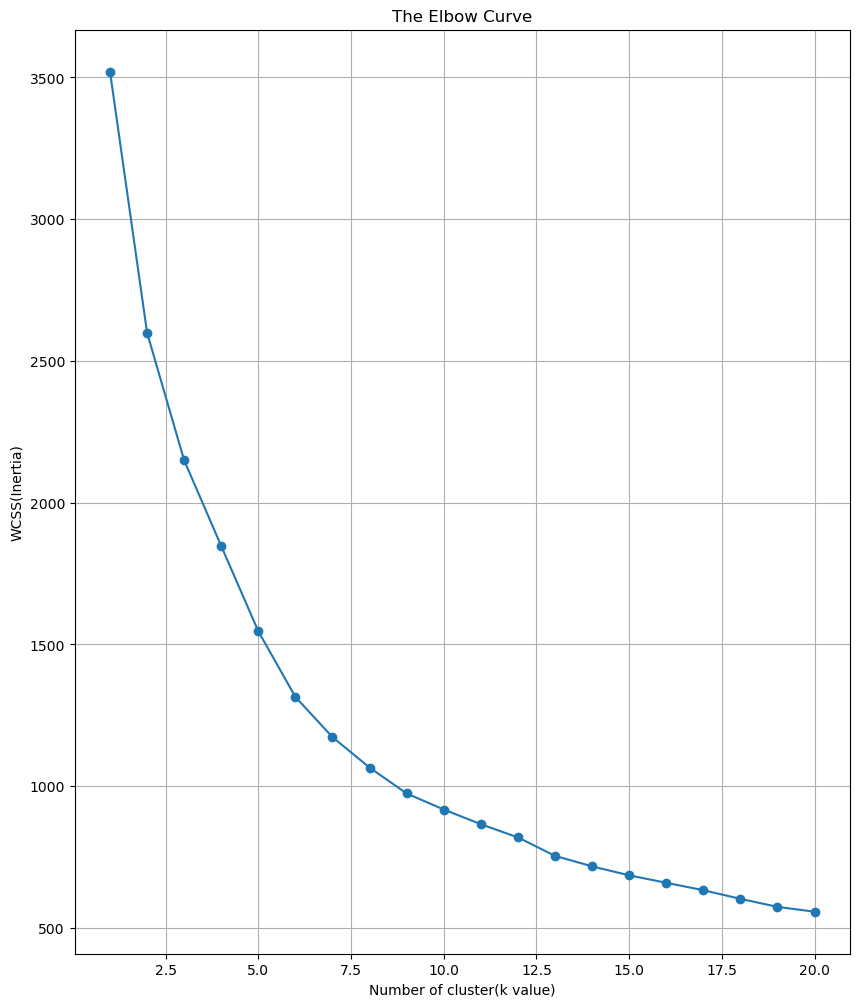

In [6]:
# checking Different k values and selecting k
wcss=[]
for k in range(1,21):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(data_scaled)
    wcss.append(kmean.inertia_)
    
plt.figure(figsize=(10,12))
plt.plot(range(1,21),wcss,marker='o')
plt.xlabel("Number of cluster(k value)")
plt.ylabel("WCSS(Inertia)")
plt.title("The Elbow Curve")
plt.grid(True)
plt.show()


In [7]:
# Model Creation and Traning(setting k=7)
CustomerSegmentation=KMeans(n_clusters=7,init="k-means++")
CustomerSegmentation.fit(data_scaled)

# check inertia
print(CustomerSegmentation.inertia_)
print("Cluster Centers:", CustomerSegmentation.cluster_centers_)
print("Labels:", CustomerSegmentation.labels_)


1173.7285957651097
Cluster Centers: [[ 1.44865163e+00  1.63142372e-01 -3.47307951e-01  4.28317250e-01
   6.66702394e-01 -3.55967591e-01  6.92257331e-01  5.10760509e-03]
 [-6.90297086e-01  5.90668285e-01 -2.52033049e-01 -3.85809244e-01
  -4.76606883e-01 -8.06492077e-02 -4.42468053e-01 -1.83933396e-01]
 [ 1.44865163e+00  2.93864819e-03  3.88728973e-01  3.94304862e+00
   4.02164626e+00  3.57841274e-02  4.22611641e+00  9.41635735e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.85958124e-01  3.06837875e-01  2.20613537e+00 -1.19291097e-01
  -2.32891763e-01  7.20743321e-01 -4.15801071e-01  3.80233936e-01]
 [-5.65939603e-01 -1.58939862e+00 -1.29162616e-01 -3.53211563e-01
  -4.09523871e-01  3.37648564e-02 -4.22842794e-01 -1.48108824e-01]
 [-6.90297086e-01 -5.58343155e-02  7.92784210e-01  5.61685048e-01
  -1.13014360e-02  9.25255676e+00 -4.64047057e-01  9.33164138e-01]]
Labels: [0 0 0 1 0 0 0 0 1 0 0 0

In [8]:
# Model checking
pred=CustomerSegmentation.predict(data_scaled)
df_pred=pd.DataFrame(data_scaled)
df_pred['Cluster']=pred
print(df_pred.head())
print(df_pred.tail())
df_pred['Cluster'].value_counts()

          0         1         2         3         4         5         6  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367 -0.043569   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136  0.086407   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536  0.133232   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144 -0.498588   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859 -0.231918   

          7  Cluster  
0 -0.066339        0  
1  0.089151        0  
2  2.243293        0  
3  0.093411        1  
4  1.299347        0  
            0         1         2         3         4         5         6  \
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222 -0.566831   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561 -0.585519   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380  2.511218   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441 -0.569770   
439 -0.690297  0.590668 -0

Cluster
1    175
0    124
5     86
4     41
2     11
6      2
3      1
Name: count, dtype: int64

## Exporting Model

In [9]:
joblib.dump(CustomerSegmentation,'Customer_Segmentation_Model.pkl')

['Customer_Segmentation_Model.pkl']